# Pandas

### Purpose

Pandas (Panel Datasets) is a data science Python library to clean, transform and analyze datasets.  
A dataset is represented by a `DataFrame`, a table of data with named columns called `Series`.  

### Dataframe creation

Dataframes can be created from :
- a python dict object (each key of the dict is a series of the dataframe)
- a file (CSV, JSON)
- a SQL query

In [57]:
import pandas as pd

# Create a test dataframe
data = {
    'orderRef': ['A001', 'A007', 'A010', 'A011'],
    'client': ['Bob', 'Alice', 'Bob', 'John'],
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
df = pd.DataFrame(data)
df = df.set_index('orderRef')   # we can set a column of the dataframe as the index

df

,client,apples,oranges
orderRef,,,
A001,Bob,3,0
A007,Alice,2,3
A010,Bob,0,7
A011,John,1,2


In [58]:
# display the line with given index as a Series
df.loc['A010']

client     Bob
apples       0
oranges      7
Name: A010, dtype: object

In [59]:
# display the column with the given name as a Series
df['apples']

orderRef
A001    3
A007    2
A010    0
A011    1
Name: apples, dtype: int64

In [60]:
# Import a dataset from a CSV file
# if the CSV has no header, pass the "names" array parameters with column names
df = pd.read_csv('data/purchases.csv', index_col="orderRef")
df

,client,apples,oranges
orderRef,,,
A001,Bob,3,0
A007,Alice,2,3
A010,Bob,0,7
A011,John,1,2


Pandas dataframes can easily be exported to JSON, CSV or SQL :

In [61]:
df.to_csv('new_purchases.csv')
df.to_json('new_purchases.json')

## Dataset overview

The functions `head(n)` and `tail(n)` show the first/last n lines of the dataset :

In [62]:
df = pd.read_csv("data/IMDB-Movie-Data.csv", index_col="Title")
df.head()
df.tail()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [63]:
#  row counts, null values for each column, column types, memory used...
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [64]:
# number of rows and columns
df.shape

(1000, 11)

## Data cleaning

In [65]:
df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [66]:
# Rename some columns
df.rename(columns={
    "Runtime (Minutes)": "Runtime",
    "Revenue (Millions)": "Revenue"
}, inplace=True)
df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [67]:
# Rename all columns
df.columns = [col.lower() for col in df.columns]

In [68]:
# delete a column
df.pop('actors')

Title
Guardians of the Galaxy    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
Prometheus                 Noomi Rapace, Logan Marshall-Green, Michael Fa...
Split                      James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
Sing                       Matthew McConaughey,Reese Witherspoon, Seth Ma...
Suicide Squad              Will Smith, Jared Leto, Margot Robbie, Viola D...
                                                 ...                        
Secret in Their Eyes       Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...
Hostel: Part II            Lauren German, Heather Matarazzo, Bijou Philli...
Step Up 2: The Streets     Robert Hoffman, Briana Evigan, Cassie Ventura,...
Search Party               Adam Pally, T.J. Miller, Thomas Middleditch,Sh...
Nine Lives                 Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...
Name: actors, Length: 1000, dtype: object

In [69]:
# delete the i-th row
df.drop('Nine Lives')

,rank,genre,description,director,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,2012,88,6.7,164088,54.72,48.0
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,2007,94,5.5,73152,17.54,46.0


In [70]:
# dataframe of boolean saying if the cell is null (None or NaN)
null_matrix = df.isnull()

# number of null for each series
df.isnull().sum()

rank             0
genre            0
description      0
director         0
year             0
runtime          0
rating           0
votes            0
revenue        128
metascore       64
dtype: int64

### Dealing with Null data

Some rows may have some missing values for some columns.  
There are 2 ways to address it :
- remove the lines with missing data (if just a small number)
- fill the missing values with mean or median of the series

In [71]:
# drop rows with at least one null value (in a new dataframe, use inplace to update the original)
df2 = df.dropna()

In [72]:
# drop rows with Null in some specific columns
df3 = df.dropna(subset=['revenue'])

In [73]:
# replace null values by a given value
revenue_median = df['revenue'].median()
df['revenue'].fillna(revenue_median, inplace=True)

score_mean = df['metascore'].mean()
df['metascore'].fillna(score_mean, inplace=True)

In [74]:
# Append a dataframe to another
tmp = df.append(df)
tmp.shape

(2000, 10)

In [75]:
# Remove duplicate rows
tmp.drop_duplicates(inplace=True, keep="first")  # first / last / False (drop them all)
tmp.shape

(1000, 10)

## Data exploration

In [76]:
# statistics on each numeric column (count, mean, std, min/max...)
df.describe()

,rank,year,runtime,rating,votes,revenue,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,78.480040,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,97.118097,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [77]:
# describe() on a categorical column gives info as well
df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

In [78]:
# count of each value for a categorical column
df['genre'].value_counts()

Action,Adventure,Sci-Fi     50
Drama                       48
Comedy,Drama,Romance        35
Comedy                      32
Drama,Romance               31
                            ..
Fantasy,Mystery,Thriller     1
Action,Drama,War             1
Romance,Sci-Fi,Thriller      1
Comedy,Drama,Thriller        1
Action,Biography,Crime       1
Name: genre, Length: 207, dtype: int64

In [79]:
# Check the correlation between columns
# Correlation are in [-1, 1] :
#   ->  1 means if one goes up the other too
#   -> -1 means if one goes up the other goes down
#   ->  0 means no correlation
#   -> no real correlation if |corr| < 0.5
df.corr()

,rank,year,runtime,rating,votes,revenue,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.259607,-0.185159
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.146589,-0.076077
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.272955,0.202239
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.218448,0.604723
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.638758,0.318116
revenue,-0.259607,-0.146589,0.272955,0.218448,0.638758,1.000000,0.142058
metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.142058,1.000000


In [80]:
# Sort the dataframe on some columns
sorted = df.sort_values(['rating', 'year'], ascending=False)
sorted.head()

,rank,genre,description,director,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,2008,152,9.0,1791916,533.32,82.000000
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,2016,161,8.8,48969,11.15,58.985043
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,2010,148,8.8,1583625,292.57,74.000000
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,2016,106,8.6,34110,4.68,79.000000
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,2014,169,8.6,1047747,187.99,74.000000


## Slicing / Selecting / Extracting

In [81]:
# Select on columns
df['rank']              # Series (rank column)
df[['rank', 'year']]    # DataFrame (sub-dataframe with only 2 columns)
df[['rank']]            # DataFrame (sub-dataframe with only 1 column)

# Select on rows
df.loc['Split']         # Series (row with "Split" title)
df.iloc[2]              # Series (i-th row)
df.iloc[2:5]            # Sliced DataFrame (rows i to j excluded)
df[df['rating'] > 8.5]  # Filter rows on a condition on a column
df[(df['rating'] > 8.5) | (df['rating'] < 3)]
df[(df['rating'] > 8.5) & (df['director'] == 'Christopher Nolan')]

,rank,genre,description,director,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,2010,148,8.8,1583625,292.57,74.0


Creation of a new column as a function on an existing column :

In [82]:
def get_grade(rating):
    if rating > 8:
        return 'S'
    elif rating > 7:
        return 'A'
    else:
        return 'B'
    
# Add a new column in the dataframe
df['grade'] = df['rating'].apply(get_grade)
df.head()

,rank,genre,description,director,year,runtime,rating,votes,revenue,metascore,grade
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,S
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,B
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,A
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,A
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,B


## Plotting

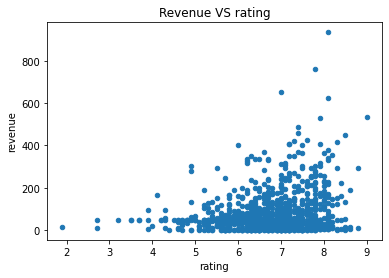

In [83]:
# Scatter plot of one column VS another
# (use a ; at the end to hide the matplotlib trace)
df.plot(kind='scatter', x='rating', y='revenue', title='Revenue VS rating');

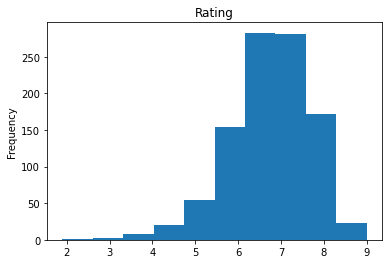

In [84]:
# Histogram for frequencies of one column
df['rating'].plot(kind='hist', title='Rating');

<AxesSubplot:xlabel='rating', ylabel='Count'>

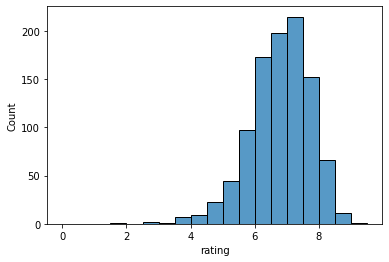

In [88]:
# similar plot using seaborn
import seaborn as sns
import numpy as np
sns.histplot(data=df, x='rating', bins=np.arange(0, 10, 0.5))

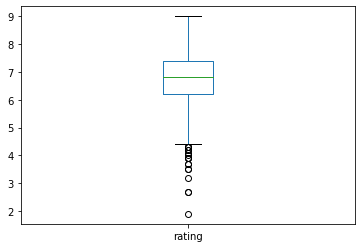

In [86]:
# box plot to show a column's distribution (similar to the result of "describe")
df['rating'].plot(kind='box');

<AxesSubplot:title={'center':'revenue'}, xlabel='grade'>

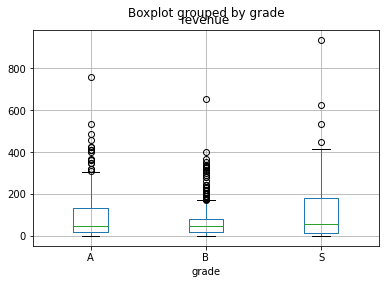

In [87]:
# box plot of a column split by another column
# now the plot is done at the dataframe level
df.boxplot(column='revenue', by='grade')